### In this notebook, we test various stepsize patterns presented in [1] "Provably Faster Gradient Descent via Long Steps" by Benjamin Grimmer ###

In [1]:
import numpy as np
import matplotlib.pyplot as plt

To reproduce the results in [1] p. 4, we use two objective functions of the least squares problem: <br>
$f(x) = ||Ax-b||_2^2$ where $A\in\mathbb{R}^{n\times n}$, $b \in \mathbb{R}^n$ with i.i.d normal entries and $n=4000$ <br>
$g(x) = ||Ax-b||_2^2 + ||x||_2^2$  with identical $A, b$ and an added regularizer term <br> <br>

for these functions, the gradients are the following: <br>
$\nabla_x f(x) = 2 A^T(Ax-b)$ <br>
$\nabla_x g(x) = 2 A^T(Ax-b) + 2 x$ <br> <br>

What is left is to calculate the Lipschitz constants for the gradients. In fact, for any $x,y \in \mathbb{R}^n$, we have <br>
$||\nabla_x f(x) - \nabla_x f(y)|| = || 2 A^T(Ax-b-Ay+b)|| = ||2A^TA(x-y)|| \le 2||A^TA||||x-y|| = L_1 ||x-y||$ with $L_1 = 2||A||^2$ <br>
and similarly, <br>
$||\nabla_x g(x) - \nabla_x g(y)|| \le L_2 ||x-y||$ with $L_2 = 2||A||^2 + 2$ <br> <br>

Below, we create a random least squares problem and provide a function for gradient descent with stepsize patterns of variable length 

In [2]:
#generate random least squares problem
s = 4000
b = np.random.normal(size=(s,1))
A = np.random.normal(size=(s,s))
#A = np.identity(s)

#calculate A^T times A for the gradient and the Lipschitz constant
A_T = np.transpose(A)
A_T_A = np.matmul(A_T,A) 
L_1 = 2 * np.linalg.norm(A,2)**2
L_2 = L_1 + 2

#helper functions for gradient descent

#evaluate objective function without regularizer
def objective1(x):
    return np.linalg.norm(np.matmul(A,x)-b,2)**2

#...with regularizer
def objective2(x):
    return objective1(x) + np.linalg.norm(x,2)**2

#evaluate gradient of objective function without regularizer
def grad1(x):
    return 2 * (np.matmul(A_T_A,x) - np.matmul(A_T,b)) 

#...with regularizer
def grad2(x):
    return grad1(x) + 2 * x

#calculate a single gradient-descent step given the stepsize and the value of the previous step, without regularizer
def gradstep1(x,h):
    return x - (h/L_1)*grad1(x)

#...with regularizer
def gradstep2(x,h):
    return x - (h/L_2)*grad2(x)



In [3]:
#function for gradient descent with stepsize pattern
def graddesc(x_0,H,T,reg = False):

    result = np.zeros(T)
    X = np.zeros((T,4000,1))
    if(reg): 
        obj = objective2
        gradstep = gradstep2
    else: 
        obj = objective1
        gradstep = gradstep1

    result[0] = obj(x_0)
    X[0,:] = x_0
    for t in range (1,T):
        h = H[(t-1) % len(H)]
        X[t,:] = gradstep(X[t-1,:],h)
        result[t] = obj(X[t])
        print("t= ",t," h_t = ", h, " objective =", result[t])#, "gradient = ", gradstep(X[t-1,:],h))
    return X, result


Test stuff

In [4]:
x_0 = np.zeros_like(b)
print(objective1(x_0),objective2(x_0),grad1(x_0),grad2(x_0),L_1,L_2) 

3939.871386087659 3939.871386087659 [[  -8.90837931]
 [  69.99640118]
 [ -55.68902547]
 ...
 [-143.98651656]
 [ 105.27485801]
 [  57.20826696]] [[  -8.90837931]
 [  69.99640118]
 [ -55.68902547]
 ...
 [-143.98651656]
 [ 105.27485801]
 [  57.20826696]] 31821.486505484172 31823.486505484172


Now, we test the stepsize patterns provided in [1] on our random least square problem

In [7]:
# initial value
x_0 = np.zeros_like(b)
# number of descent iterations
T = 2000

#set stepsize patterns
H_GRDESC = [1]
H_2 = [2.9, 1.5] # taking nu = 0.1
H_3 = [1.5, 4.9, 1.5]
H_7 = [1.5, 2.2, 1.5, 12.0, 1.5, 2.2, 1.5]
H_15 = [1.4, 2.0, 1.4, 4.5, 1.4, 2.0, 1.4, 29.7, 1.4, 2.0, 1.4, 4.5, 1.4, 2.0, 1.4]
H_31 = [1.4, 2.0, 1.4, 3.9, 1.4, 2.0, 1.4, 8.2, 1.4, 2.0, 1.4, 3.9, 1.4, 2.0, 1.4, 72.3, 1.4, 2.0, 1.4, 3.9, 1.4, 2.0, 1.4, 8.2, 1.4, 2.0, 1.4, 3.9, 1.4, 2.0, 1.4]
H_63 = [1.4, 2.0, 1.4, 3.9, 1.4, 2.0, 1.4, 7.2, 1.4, 2.0, 1.4, 3.9, 1.4, 2.0, 1.4, 14.2, 1.4, 2.0, 1.4, 3.9, 1.4, 2.0, 1.4, 7.2, 1.4, 2.0, 1.4, 3.9, 1.4, 2.0, 1.4, 164.0, 1.4, 2.0, 1.4, 3.9, 1.4, 2.0, 1.4, 7.2, 1.4, 2.0, 1.4, 3.9, 1.4, 2.0, 1.4, 14.2, 1.4, 2.0, 1.4, 3.9, 1.4, 2.0, 1.4, 7.2, 1.4, 2.0, 1.4, 3.9, 1.4, 2.0, 1.4]
H_127 = [1.4, 2.0, 1.4, 3.9, 1.4, 2.0, 1.4, 7.2, 1.4, 2.0, 1.4, 3.9, 1.4, 2.0, 1.4, 12.6, 1.4, 2.0, 1.4, 3.9, 1.4, 2.0, 1.4, 7.2, 1.4, 2.0, 1.4, 3.9, 1.4, 2.0, 1.4, 23.5, 1.4, 2.0, 1.4, 3.9, 1.4, 2.0, 1.4, 7.2, 1.4, 2.0, 1.4, 3.9, 1.4, 2.0, 1.4, 12.6, 1.4, 2.0, 1.4, 3.9, 1.4, 2.0, 1.4, 7.2, 1.4, 2.0, 1.4, 3.9, 1.4, 2.0, 1.4, 370.0, 1.4, 2.0, 1.4, 3.9, 1.4, 2.0, 1.4, 7.2, 1.4, 2.0, 1.4, 3.9, 1.4, 2.0, 1.4, 12.6, 1.4, 2.0, 1.4, 3.9, 1.4, 2.0, 1.4, 7.2, 1.4, 2.0, 1.4, 3.9, 1.4, 2.0, 1.4, 23.5, 1.4, 2.0, 1.4, 3.9, 1.4, 2.0, 1.4, 7.5, 1.4, 2.0, 1.4, 3.9, 1.4, 2.0, 1.4, 12.6, 1.4, 2.0, 1.4, 3.9, 1.4, 2.0, 1.4, 7.2, 1.4, 2.0, 1.4, 3.9, 1.4, 2.0, 1.4]

#test without regularizer
X_GRDESC, result_GRDESC = graddesc(x_0,H_GRDESC,T,reg=False)
X_2, result_2 = graddesc(x_0,H_2,T,reg=False)
X_3, result_3 = graddesc(x_0,H_3,T,reg=False)
X_7, result_7 = graddesc(x_0,H_7,T,reg=False)
X_15, result_15 = graddesc(x_0,H_15,T,reg=False)
X_31, result_31 = graddesc(x_0,H_31,T,reg=False)
X_63, result_63 = graddesc(x_0,H_63,T,reg=False)
X_127, result_127 = graddesc(x_0,H_127,T,reg=False)

#test with regularizer
X_GRDESC_reg, result_GRDESC_reg = graddesc(x_0,H_GRDESC,T,reg=True)
X_2_reg, result_2_reg = graddesc(x_0,H_2,T,reg=True)
X_3_reg, result_3_reg = graddesc(x_0,H_3,T,reg=True)
X_7_reg, result_7_reg = graddesc(x_0,H_7,T,reg=True)
X_15_reg, result_15_reg = graddesc(x_0,H_15,T,reg=True)
X_31_reg, result_31_reg = graddesc(x_0,H_31,T,reg=True)
X_63_reg, result_63_reg = graddesc(x_0,H_63,T,reg=True)
X_127_reg, result_127_reg = graddesc(x_0,H_127,T,reg=True)




t=  1  h_t =  1  objective = 2467.1300612595337
t=  2  h_t =  1  objective = 1955.3275322208049
t=  3  h_t =  1  objective = 1674.2132031025044
t=  4  h_t =  1  objective = 1490.7093530201926
t=  5  h_t =  1  objective = 1358.8762474952705
t=  6  h_t =  1  objective = 1258.151378850907
t=  7  h_t =  1  objective = 1177.832220048413
t=  8  h_t =  1  objective = 1111.745869667273
t=  9  h_t =  1  objective = 1056.0536549360747
t=  10  h_t =  1  objective = 1008.227557915891
t=  11  h_t =  1  objective = 966.5262450736026
t=  12  h_t =  1  objective = 929.7062743402738
t=  13  h_t =  1  objective = 896.8531209134362
t=  14  h_t =  1  objective = 867.2773467946273
t=  15  h_t =  1  objective = 840.4481552426943
t=  16  h_t =  1  objective = 815.9493950843707
t=  17  h_t =  1  objective = 793.4495734128791
t=  18  h_t =  1  objective = 772.6809002797987
t=  19  h_t =  1  objective = 753.424323588925
t=  20  h_t =  1  objective = 735.4986357205324
t=  21  h_t =  1  objective = 718.7524083294

Below, we visualize the value of the Objective function for each stepsize pattern over the gradient descent iterations 

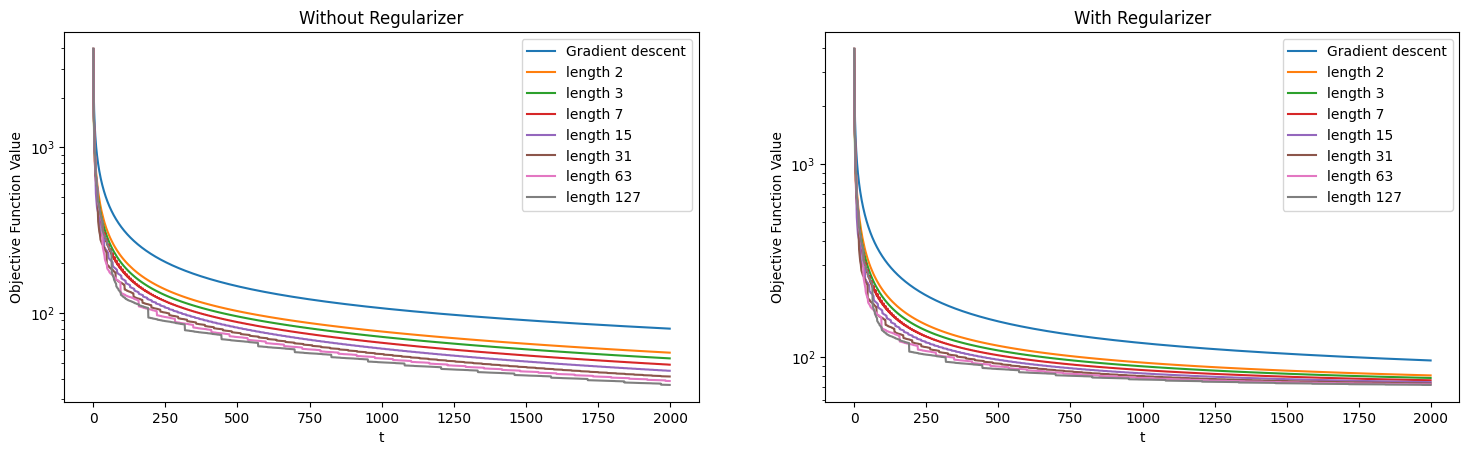

In [21]:
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_figwidth(18)
ax1.plot(result_GRDESC, label='Gradient descent')
ax1.plot(result_2, label='length 2')
ax1.plot(result_3, label='length 3')
ax1.plot(result_7, label='length 7')
ax1.plot(result_15, label='length 15')
ax1.plot(result_31, label='length 31')
ax1.plot(result_63, label='length 63')
ax1.plot(result_127, label='length 127')
ax1.set_yscale('log')
ax1.set_xlabel("t")
ax1.set_ylabel("Objective Function Value")
ax1.set_title("Without Regularizer")
ax1.legend()
#ax1.set_ylim([0,2000])

ax2.plot(result_GRDESC_reg, label='Gradient descent')
ax2.plot(result_2_reg, label='length 2')
ax2.plot(result_3_reg, label='length 3')
ax2.plot(result_7_reg, label='length 7')
ax2.plot(result_15_reg, label='length 15')
ax2.plot(result_31_reg, label='length 31')
ax2.plot(result_63_reg, label='length 63')
ax2.plot(result_127_reg, label='length 127')
ax2.set_yscale('log')
ax2.set_xlabel("t")
ax2.set_ylabel("Objective Function Value")
ax2.set_title("With Regularizer")
ax2.legend()
#ax2.set_ylim([0,2000])
